In [1]:
import keras
import tensorflow
import tensorflow.keras as keras
from tensorflow.keras import layers
# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [2]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [3]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [4]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [5]:
from tensorflow.keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [6]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [7]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 3s 9ms/step - loss: 0.2721 - val_loss: 0.1882
Epoch 2/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1700 - val_loss: 0.1532
Epoch 3/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1435 - val_loss: 0.1330
Epoch 4/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1276 - val_loss: 0.1203
Epoch 5/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1174 - val_loss: 0.1121
Epoch 6/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1104 - val_loss: 0.1064
Epoch 7/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1054 - val_loss: 0.1021
Epoch 8/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1019 - val_loss: 0.0992
Epoch 9/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0992 - val_loss: 0.0972
Epoch 10/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0974 - val_loss: 0.0955

In [8]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

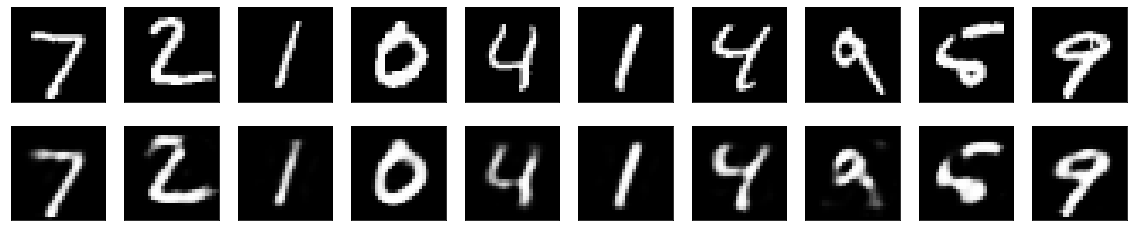

In [9]:
# Use Matplotlib
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

(60000, 784)
(10000, 784)
Epoch 1/100
235/235 [==============================] - 3s 9ms/step - loss: 0.2824 - val_loss: 0.1977
Epoch 2/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1794 - val_loss: 0.1622
Epoch 3/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1531 - val_loss: 0.1429
Epoch 4/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1385 - val_loss: 0.1321
Epoch 5/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1294 - val_loss: 0.1245
Epoch 6/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1228 - val_loss: 0.1188
Epoch 7/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1179 - val_loss: 0.1146
Epoch 8/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1143 - val_loss: 0.1115
Epoch 9/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1116 - val_loss: 0.1091
Epoch 10/100
235/235 [==============================] - 2s 9ms/

235/235 [==============================] - 2s 8ms/step - loss: 0.0974 - val_loss: 0.0964
Epoch 81/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0974 - val_loss: 0.0963
Epoch 82/100
235/235 [==============================] - 2s 9ms/step - loss: 0.0973 - val_loss: 0.0963
Epoch 83/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0973 - val_loss: 0.0963
Epoch 84/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0973 - val_loss: 0.0963
Epoch 85/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0973 - val_loss: 0.0962
Epoch 86/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0972 - val_loss: 0.0961
Epoch 87/100
235/235 [==============================] - 2s 9ms/step - loss: 0.0972 - val_loss: 0.0961
Epoch 88/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0972 - val_loss: 0.0962
Epoch 89/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0971 - val_loss: 

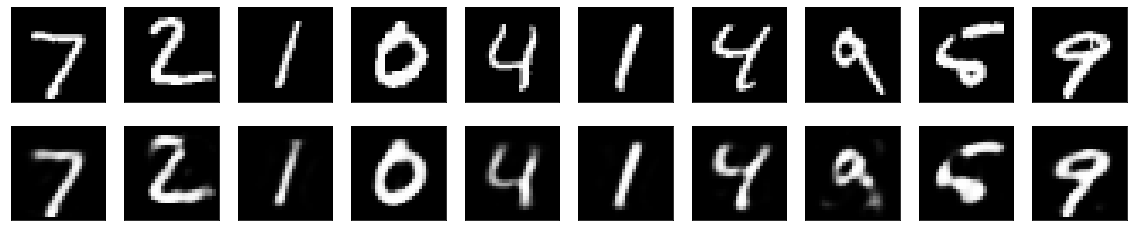

In [10]:
from tensorflow.keras import regularizers

encoding_dim = 32

input_img = keras.Input(shape=(784,))
# Add a Dense layer with a L1 activity regularizer
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)


# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Epoch 1/100
235/235 [==============================] - 4s 15ms/step - loss: 0.2453 - val_loss: 0.1678
Epoch 2/100
235/235 [==============================] - 3s 14ms/step - loss: 0.1486 - val_loss: 0.1335
Epoch 3/100
235/235 [==============================] - 3s 14ms/step - loss: 0.1298 - val_loss: 0.1242
Epoch 4/100
235/235 [==============================] - 3s 15ms/step - loss: 0.1229 - val_loss: 0.1183
Epoch 5/100
235/235 [==============================] - 3s 14ms/step - loss: 0.1174 - val_loss: 0.1129
Epoch 6/100
235/235 [==============================] - 3s 14ms/step - loss: 0.1124 - val_loss: 0.1089
Epoch 7/100
235/235 [==============================] - 3s 14ms/step - loss: 0.1088 - val_loss: 0.1060
Epoch 8/100
235/235 [==============================] - 3s 14ms/step - loss: 0.1060 - val_loss: 0.1033
Epoch 9/100
235/235 [==============================] - 3s 14ms/step - loss: 0.1037 - val_loss: 0.1011
Epoch 10/100
235/235 [==============================] - 4s 15ms/step - loss: 0.101

235/235 [==============================] - 3s 14ms/step - loss: 0.0832 - val_loss: 0.0830
Epoch 81/100
235/235 [==============================] - 3s 13ms/step - loss: 0.0831 - val_loss: 0.0828
Epoch 82/100
235/235 [==============================] - 3s 14ms/step - loss: 0.0831 - val_loss: 0.0829
Epoch 83/100
235/235 [==============================] - 3s 14ms/step - loss: 0.0831 - val_loss: 0.0826
Epoch 84/100
235/235 [==============================] - 3s 14ms/step - loss: 0.0830 - val_loss: 0.0829
Epoch 85/100
235/235 [==============================] - 4s 15ms/step - loss: 0.0830 - val_loss: 0.0826
Epoch 86/100
235/235 [==============================] - 3s 14ms/step - loss: 0.0829 - val_loss: 0.0827
Epoch 87/100
235/235 [==============================] - 3s 14ms/step - loss: 0.0829 - val_loss: 0.0826
Epoch 88/100
235/235 [==============================] - 4s 15ms/step - loss: 0.0828 - val_loss: 0.0828
Epoch 89/100
235/235 [==============================] - 3s 14ms/step - loss: 0.0828 - 

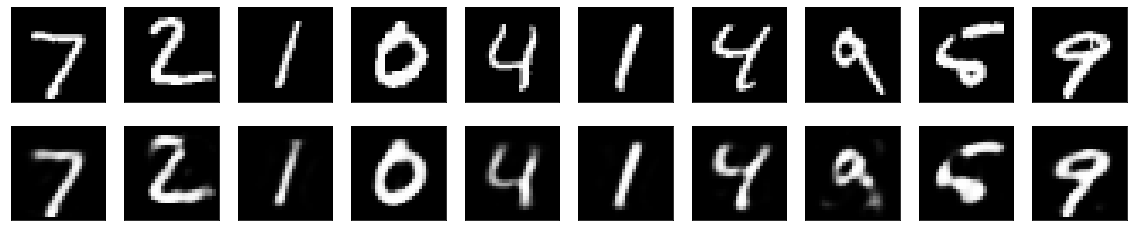

In [11]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)


autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [12]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [17]:
from tensorflow.keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/50
469/469 [==============================] - 68s 145ms/step - loss: 0.1344 - val_loss: 0.1275
Epoch 2/50
469/469 [==============================] - 63s 134ms/step - loss: 0.1249 - val_loss: 0.1202
Epoch 3/50
469/469 [==============================] - 69s 148ms/step - loss: 0.1193 - val_loss: 0.1160
Epoch 4/50
469/469 [==============================] - 73s 156ms/step - loss: 0.1157 - val_loss: 0.1132
Epoch 5/50
469/469 [==============================] - 63s 135ms/step - loss: 0.1131 - val_loss: 0.1108
Epoch 6/50
469/469 [==============================] - 64s 135ms/step - loss: 0.1112 - val_loss: 0.1090
Epoch 7/50
469/469 [==============================] - 64s 136ms/step - loss: 0.1093 - val_loss: 0.1072
Epoch 8/50
469/469 [==============================] - 67s 143ms/step - loss: 0.1076 - val_loss: 0.1055
Epoch 9/50
469/469 [==============================] - 64s 136ms/step - loss: 0.1059 - val_loss: 0.1042
Epoch 10/50
469/469 [==============================] - 63s 135ms/step - l

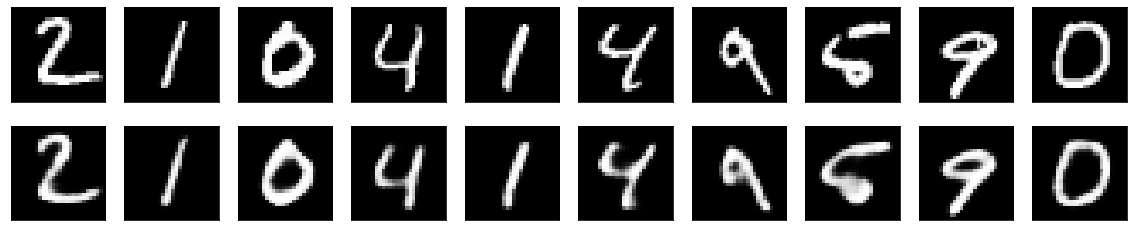

In [18]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

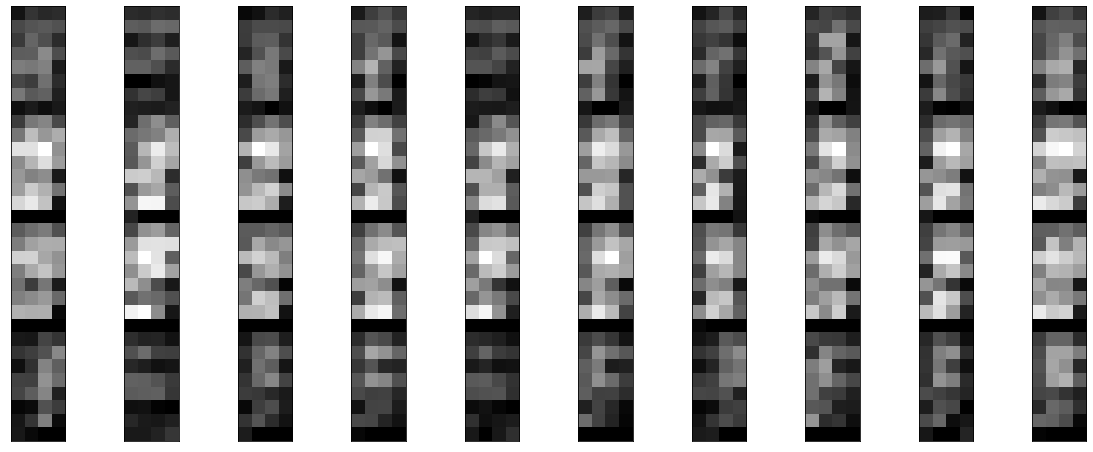

In [19]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((4, 4 * 8)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

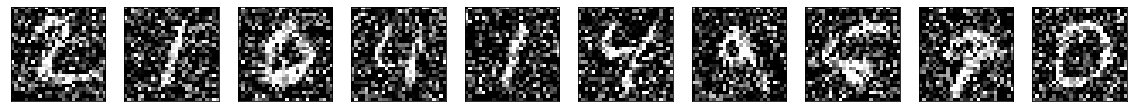

In [20]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [22]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

Epoch 1/10
469/469 [==============================] - 115s 243ms/step - loss: 0.1601 - val_loss: 0.1151
Epoch 2/10
469/469 [==============================] - 122s 260ms/step - loss: 0.1120 - val_loss: 0.1078
Epoch 3/10
469/469 [==============================] - 110s 236ms/step - loss: 0.1069 - val_loss: 0.1044
Epoch 4/10
469/469 [==============================] - 112s 239ms/step - loss: 0.1042 - val_loss: 0.1029
Epoch 5/10
469/469 [==============================] - 119s 253ms/step - loss: 0.1025 - val_loss: 0.1008
Epoch 6/10
469/469 [==============================] - 114s 243ms/step - loss: 0.1011 - val_loss: 0.0998
Epoch 7/10
469/469 [==============================] - 110s 235ms/step - loss: 0.1001 - val_loss: 0.0989
Epoch 8/10
469/469 [==============================] - 111s 238ms/step - loss: 0.0993 - val_loss: 0.0983
Epoch 9/10
469/469 [==============================] - 110s 235ms/step - loss: 0.0987 - val_loss: 0.0977
Epoch 10/10
469/469 [==============================] - 110s 235m

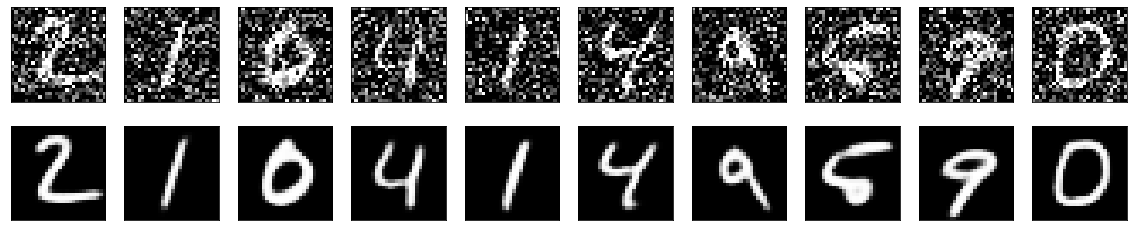

In [25]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original noisy
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [26]:
original_dim = 28 * 28
intermediate_dim = 64
latent_dim = 2

inputs = keras.Input(shape=(original_dim,))
h = layers.Dense(intermediate_dim, activation='relu')(inputs)
z_mean = layers.Dense(latent_dim)(h)
z_log_sigma = layers.Dense(latent_dim)(h)

In [27]:
from tensorflow.keras import backend as K

def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_sigma])

In [28]:
# Create encoder
encoder = keras.Model(inputs, [z_mean, z_log_sigma, z], name='encoder')

# Create decoder
latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
x = layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = layers.Dense(original_dim, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, outputs, name='decoder')

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = keras.Model(inputs, outputs, name='vae_mlp')

In [29]:
reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
reconstruction_loss *= original_dim
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

In [30]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

vae.fit(x_train, x_train,
        epochs=100,
        batch_size=32,
        validation_data=(x_test, x_test))

Epoch 1/100
1875/1875 [==============================] - 8s 4ms/step - loss: 184.9004 - val_loss: 167.8158
Epoch 2/100
1875/1875 [==============================] - 8s 4ms/step - loss: 165.4415 - val_loss: 163.9062
Epoch 3/100
1875/1875 [==============================] - 8s 4ms/step - loss: 162.3429 - val_loss: 161.5290
Epoch 4/100
1875/1875 [==============================] - 7s 3ms/step - loss: 160.2464 - val_loss: 159.5700
Epoch 5/100
1875/1875 [==============================] - 8s 4ms/step - loss: 158.5139 - val_loss: 158.0121
Epoch 6/100
1875/1875 [==============================] - 7s 4ms/step - loss: 157.0326 - val_loss: 156.7589
Epoch 7/100
1875/1875 [==============================] - 7s 4ms/step - loss: 155.7754 - val_loss: 155.5657
Epoch 8/100
1875/1875 [==============================] - 9s 5ms/step - loss: 154.7523 - val_loss: 154.7498
Epoch 9/100
1875/1875 [==============================] - 9s 5ms/step - loss: 153.9242 - val_loss: 154.0393
Epoch 10/100
1875/1875 [=============

1875/1875 [==============================] - 8s 4ms/step - loss: 144.1781 - val_loss: 146.1165
Epoch 77/100
1875/1875 [==============================] - 7s 4ms/step - loss: 144.1333 - val_loss: 146.0155
Epoch 78/100
1875/1875 [==============================] - 7s 4ms/step - loss: 144.0458 - val_loss: 146.5863
Epoch 79/100
1875/1875 [==============================] - 7s 4ms/step - loss: 144.0676 - val_loss: 145.9270
Epoch 80/100
1875/1875 [==============================] - 8s 4ms/step - loss: 143.9579 - val_loss: 146.0731
Epoch 81/100
1875/1875 [==============================] - 8s 4ms/step - loss: 143.9875 - val_loss: 145.7611
Epoch 82/100
1875/1875 [==============================] - 7s 4ms/step - loss: 143.9328 - val_loss: 146.2229
Epoch 83/100
1875/1875 [==============================] - 8s 4ms/step - loss: 143.8670 - val_loss: 145.8728
Epoch 84/100
1875/1875 [==============================] - 8s 4ms/step - loss: 143.8385 - val_loss: 146.0168
Epoch 85/100
1875/1875 [=================

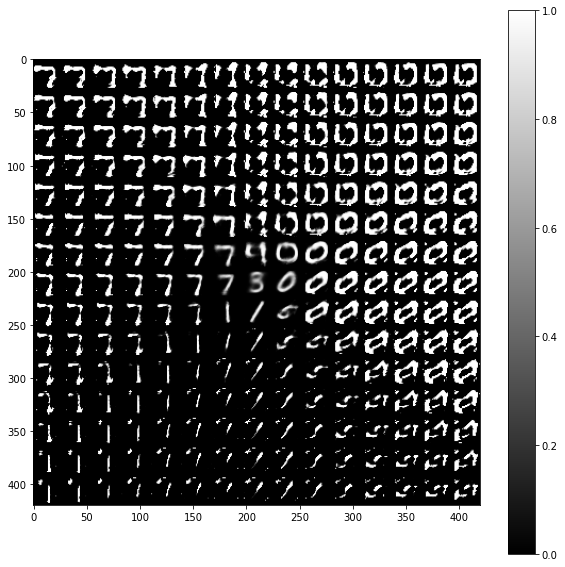

In [37]:
# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.colorbar()
plt.show()